#### [산점도 그래프]
 - 두 개의 컬럼(변수)의 관계를 시각화해서 표현
 - 연속형(수치형) 데이터에 사용함

In [33]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# [2] 데이터 준비
F_DATA = r'C:\Git\KDT\BigData\EX_PANDAS6\datasets\auto_mpg.csv'

In [35]:
dataDF = pd.read_csv(F_DATA)

In [36]:
# 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [37]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
# corr?
corrSR = dataDF.corr(numeric_only=True)['mpg']
# round(corrSR['weight'],2)
corrSR

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

In [ ]:
# - [4-2] 시각화
plt.scatter(dataDF.mpg, dataDF.weight, label= f" corr : {round(corrSR['weight'],2)}")
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

TypeError: 'Figure' object does not support item assignment

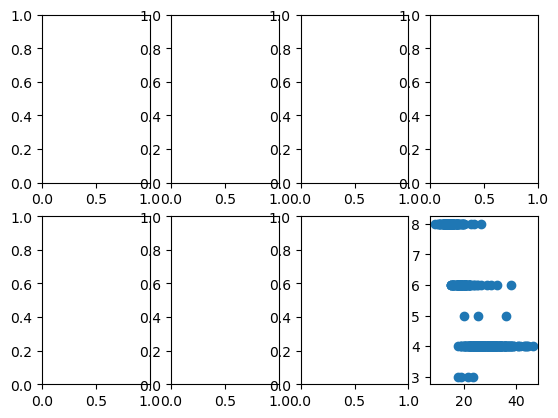

In [41]:
# - [4-3] mpg 컬럼과 다른 컬럼관의 관계 시각화
#fig=plt.figure(figsize=(12,10))
# ax1, ax2=fig.subplots(1,2, sharey=True)

axes = plt.subplots(2,4)
axes[0][0] = plt.scatter(dataDF.mpg, dataDF.cylinders, label= f" corr : {round(corrSR['cylinders'],2)}")
axes[0][1] = plt.scatter(dataDF.mpg, dataDF.displacement, label= f" corr : {round(corrSR['displacement'],2)}")
axes[0][2] = plt.scatter(dataDF.mpg, dataDF.acceleration , label= f" corr : {round(corrSR['acceleration '],2)}")
plt.xlabel('mpg')
plt.ylabel('cylinders')
plt.legend()
plt.show()